In [425]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime

In [426]:
df = pd.read_csv("data\consumption_dataset.csv")                

In [427]:
df.shape

(6575, 8)

In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6575 entries, 0 to 6574
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date Time Served      6575 non-null   object 
 1   Bar Name              6575 non-null   object 
 2   Alcohol Type          6575 non-null   object 
 3   Brand Name            6575 non-null   object 
 4   Opening Balance (ml)  6575 non-null   float64
 5   Purchase (ml)         6575 non-null   float64
 6   Consumed (ml)         6575 non-null   float64
 7   Closing Balance (ml)  6575 non-null   float64
dtypes: float64(4), object(4)
memory usage: 411.1+ KB


In [429]:
df.describe()

,Opening Balance (ml),Purchase (ml),Consumed (ml),Closing Balance (ml)
count,6575.000000,6575.000000,6575.000000,6575.000000
mean,2468.397180,315.841757,299.419264,2484.811748
std,2284.552895,582.120264,191.903874,2302.363298
min,0.000000,0.000000,0.000000,0.000000
25%,619.135000,0.000000,156.640000,611.000000
50%,1848.440000,0.000000,300.390000,1849.840000
75%,3853.020000,526.345000,450.870000,3906.050000
max,11862.520000,1999.840000,1180.580000,11862.520000


In [430]:
df.tail(5)

,Date Time Served,Bar Name,Alcohol Type,Brand Name,Opening Balance (ml),Purchase (ml),Consumed (ml),Closing Balance (ml)
6570,1/1/2024 21:03,Anderson's Bar,Beer,Coors,2.467080e+03,0.00,321.06,2146.02
6571,1/1/2024 21:15,Anderson's Bar,Rum,Malibu,8.530000e-14,1743.64,175.05,1568.59
6572,1/1/2024 18:34,Anderson's Bar,Whiskey,Jack Daniels,4.192660e+03,0.00,197.60,3995.06
6573,1/1/2024 22:46,Thomas's Bar,Vodka,Absolut,2.424950e+03,0.00,128.52,2296.43
6574,1/1/2024 21:26,Thomas's Bar,Rum,Bacardi,1.778360e+03,1195.45,572.60,2401.21


Month/time related data gathering

In [431]:
df['Date Time Served'] = pd.to_datetime(df['Date Time Served'])

In [432]:
df['Date'] = df['Date Time Served'].dt.date

In [433]:
df['Hour'] = df['Date Time Served'].dt.hour

In [434]:
df['Day_of_Week'] = df['Date Time Served'].dt.day_name()

In [435]:
df['Week'] = df['Date Time Served'].dt.isocalendar().week

In [436]:
df['Month'] = df['Date Time Served'].dt.month

In [437]:
df['Year'] = df['Date Time Served'].dt.year

In [438]:
df.head(1)

,Date Time Served,Bar Name,Alcohol Type,Brand Name,Opening Balance (ml),Purchase (ml),Consumed (ml),Closing Balance (ml),Date,Hour,Day_of_Week,Week,Month,Year
0,2023-01-01 19:35:00,Smith's Bar,Rum,Captain Morgan,2555.04,1824.84,0.0,4379.88,2023-01-01,19,Sunday,52,1,2023


Understanding the unique entries

In [439]:
df['Bar Name'].unique()

array(["Smith's Bar", "Johnson's Bar", "Brown's Bar", "Taylor's Bar",
       "Anderson's Bar", "Thomas's Bar"], dtype=object)

In [440]:
df['Alcohol Type'].unique()

array(['Rum', 'Wine', 'Vodka', 'Beer', 'Whiskey'], dtype=object)

In [441]:
df['Brand Name'].unique()

array(['Captain Morgan', 'Yellow Tail', 'Grey Goose', 'Coors', 'Jim Beam',
       'Absolut', 'Jack Daniels', 'Sutter Home', 'Miller', 'Bacardi',
       'Malibu', 'Jameson', 'Smirnoff', 'Budweiser', 'Heineken',
       'Barefoot'], dtype=object)

In [442]:
df['Brand Name'].nunique()

16

`So we have 6 bars and 5 types of alchols and 16 alchol brands`


whether bar is open or closed ?

In [443]:
df['Is_Operating_Day'] = (df['Consumed (ml)'] > 0) | (df['Purchase (ml)'] > 0)

In [444]:
df.head(1)

,Date Time Served,Bar Name,Alcohol Type,Brand Name,Opening Balance (ml),Purchase (ml),Consumed (ml),Closing Balance (ml),Date,Hour,Day_of_Week,Week,Month,Year,Is_Operating_Day
0,2023-01-01 19:35:00,Smith's Bar,Rum,Captain Morgan,2555.04,1824.84,0.0,4379.88,2023-01-01,19,Sunday,52,1,2023,True


what was total/ average alchol availabe for the day?

In [445]:
df['Total_Available'] = df['Opening Balance (ml)'] + df['Purchase (ml)']
df['Total_Available'] = df['Total_Available'].replace(0, np.nan)

In [446]:
df['Average_Stock'] = (df['Opening Balance (ml)'] + df['Closing Balance (ml)']) / 2
df['Average_Stock'] = df['Average_Stock'].replace(0, np.nan)

In [447]:
df[25:30]

,Date Time Served,Bar Name,Alcohol Type,Brand Name,Opening Balance (ml),Purchase (ml),Consumed (ml),Closing Balance (ml),Date,Hour,Day_of_Week,Week,Month,Year,Is_Operating_Day,Total_Available,Average_Stock
25,2023-01-02 22:34:00,Brown's Bar,Wine,Yellow Tail,2792.52,0.00,535.95,2256.57,2023-01-02,22,Monday,1,1,2023,True,2792.52,2524.545
26,2023-01-02 16:29:00,Brown's Bar,Rum,Bacardi,748.43,0.00,134.75,613.68,2023-01-02,16,Monday,1,1,2023,True,748.43,681.055
27,2023-01-02 20:20:00,Brown's Bar,Whiskey,Jack Daniels,623.50,0.00,200.99,422.51,2023-01-02,20,Monday,1,1,2023,True,623.50,523.005
28,2023-01-02 18:24:00,Taylor's Bar,Beer,Coors,1862.65,0.00,310.20,1552.45,2023-01-02,18,Monday,1,1,2023,True,1862.65,1707.550
29,2023-01-02 20:54:00,Taylor's Bar,Rum,Malibu,750.90,857.77,497.71,1110.96,2023-01-02,20,Monday,1,1,2023,True,1608.67,930.930


Daytime based division :

In [448]:
df['Hour_Category'] = pd.cut(df['Hour'], bins=[0, 6, 12, 17, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])

In [449]:
df.head(5)

,Date Time Served,Bar Name,Alcohol Type,Brand Name,Opening Balance (ml),Purchase (ml),Consumed (ml),Closing Balance (ml),Date,Hour,Day_of_Week,Week,Month,Year,Is_Operating_Day,Total_Available,Average_Stock,Hour_Category
0,2023-01-01 19:35:00,Smith's Bar,Rum,Captain Morgan,2555.04,1824.84,0.0,4379.88,2023-01-01,19,Sunday,52,1,2023,True,4379.88,3467.46,Evening
1,2023-01-01 10:07:00,Smith's Bar,Wine,Yellow Tail,1344.37,0.00,0.0,1344.37,2023-01-01,10,Sunday,52,1,2023,False,1344.37,1344.37,Morning
2,2023-01-01 11:26:00,Johnson's Bar,Vodka,Grey Goose,1034.28,0.00,0.0,1034.28,2023-01-01,11,Sunday,52,1,2023,False,1034.28,1034.28,Morning
3,2023-01-01 13:53:00,Johnson's Bar,Beer,Coors,2194.53,0.00,0.0,2194.53,2023-01-01,13,Sunday,52,1,2023,False,2194.53,2194.53,Afternoon
4,2023-01-01 22:28:00,Johnson's Bar,Wine,Yellow Tail,1020.90,0.00,0.0,1020.90,2023-01-01,22,Sunday,52,1,2023,False,1020.90,1020.90,Evening


Validating Closing Entry 

In [450]:
df["Expected_Closing"]= df['Opening Balance (ml)'] + df['Purchase (ml)'] - df['Consumed (ml)']

In [451]:
df['Balance_Check'] = df['Opening Balance (ml)'] + df['Purchase (ml)'] - df['Consumed (ml)'] - df['Closing Balance (ml)']

In [452]:
balance_issues = df[abs(df['Balance_Check']) > 0.01].copy() 
if len(balance_issues) > 0:
    print(f"Warning: Found {len(balance_issues)} rows with balance equation issues")

In [453]:
balance_issues.head(5)

,Date Time Served,Bar Name,Alcohol Type,Brand Name,Opening Balance (ml),Purchase (ml),Consumed (ml),Closing Balance (ml),Date,Hour,Day_of_Week,Week,Month,Year,Is_Operating_Day,Total_Available,Average_Stock,Hour_Category,Expected_Closing,Balance_Check
42,2023-01-03 20:00:00,Brown's Bar,Whiskey,Jim Beam,826.20,0.00,227.73,598.0,2023-01-03,20,Tuesday,1,1,2023,True,826.20,712.100,Evening,598.47,0.47
58,2023-01-04 10:45:00,Smith's Bar,Beer,Miller,2300.00,0.00,349.22,1950.0,2023-01-04,10,Wednesday,1,1,2023,True,2300.00,2125.000,Morning,1950.78,0.78
99,2023-01-06 13:10:00,Johnson's Bar,Wine,Barefoot,1427.79,0.00,248.86,1180.0,2023-01-06,13,Friday,1,1,2023,True,1427.79,1303.895,Afternoon,1178.93,-1.07
125,2023-01-07 14:01:00,Taylor's Bar,Whiskey,Jim Beam,2510.00,0.00,494.68,2010.0,2023-01-07,14,Saturday,1,1,2023,True,2510.00,2260.000,Afternoon,2015.32,5.32
143,2023-01-08 14:46:00,Taylor's Bar,Rum,Captain Morgan,126.78,1736.61,569.99,1290.0,2023-01-08,14,Sunday,1,1,2023,True,1863.39,708.390,Afternoon,1293.40,3.40


Checking wehre these issues happen 

In [454]:
balance_issues['Bar Name'].value_counts().head(10)  # bars with most issues


Bar Name
Smith's Bar       30
Brown's Bar       28
Thomas's Bar      26
Taylor's Bar      24
Johnson's Bar     21
Anderson's Bar    20
Name: count, dtype: int64

In [455]:
balance_issues['Alcohol Type'].value_counts().head(10)  # type with most issues

Alcohol Type
Whiskey    37
Beer       32
Wine       28
Vodka      28
Rum        24
Name: count, dtype: int64

In [456]:
balance_issues['Brand Name'].value_counts().head(10)  # brands with most issues


Brand Name
Jack Daniels      15
Jim Beam          13
Malibu            11
Barefoot          10
Heineken          10
Sutter Home       10
Grey Goose        10
Captain Morgan     9
Coors              9
Jameson            9
Name: count, dtype: int64

There is some wide spread issue in balance across almost all bars and brands. So it not a specific but full sytem problem for now.

Checking when do these issues happen most

In [457]:
balance_issues['Date Time Served'].dt.month.value_counts().sort_index()  

Date Time Served
1    39
2    60
3    50
Name: count, dtype: int64

so from spike in issue we notice that it happens in january , februrary , march. For now possible things can be huge sales or some error in entring values or something else. 

Tring to find more from what we can 

In [458]:
balance_issues['Hour'].value_counts().sort_index()

Hour
10    20
11     7
12    12
13    14
14     9
15    20
16     8
17     8
18    11
19    10
20    11
21     7
22    12
Name: count, dtype: int64

here we notice that at 10 am and 3pm we have most issue spikes in these months. i think it can be shift change/ morning deliveries/ evening crowd that can be causing this 

In [459]:
balance_issues['Day_of_Week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

Day_of_Week
Monday       25
Tuesday      18
Wednesday    23
Thursday     14
Friday       23
Saturday     24
Sunday       22
Name: count, dtype: int64

On averge we can see issue everyday but TUESDAY And THURSDAY have relatively low issue

In [460]:
balance_issues['Week'].value_counts().sort_index()

Week
1      5
2      7
3     10
4     13
5     12
6     15
7     15
8     17
9     14
10    12
11    11
12    16
13     2
Name: count, dtype: Int64

In [461]:
balance_issues['Year'].value_counts().sort_index()

Year
2023    149
Name: count, dtype: int64

Based on week analysis of 13 weeks of this time period and year we can notice that this happens within first 3 months of year across all bars and on average in all brands of and types of alchol with 'wiskey' and 'beer'. here we get most issues and from week 3 to 12 the spike lasts at 10 am and 3 pm this happens across whole week on average but tuesday and wednesday have a little less issues comparitively. 


We still are not sure about the issue what it is for now wheather its sales or an error?

Investingating top listed entries


In [462]:
top_bar_brand_issues0 = balance_issues[
    (balance_issues['Bar Name'] == "Smith's Bar") &
    (balance_issues['Brand Name'] == "Jack Daniels")
]
print("\nHours for Jack Daniels issues at Smith's Bar:")
print(top_bar_brand_issues0['Hour'].value_counts().sort_index())
print("\nDay of Week Distribution for Smith's Bar & Jack Daniels issues:")
print(top_bar_brand_issues0['Day_of_Week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']))


Hours for Jack Daniels issues at Smith's Bar:
Hour
14    1
16    1
Name: count, dtype: int64

Day of Week Distribution for Smith's Bar & Jack Daniels issues:
Day_of_Week
Monday       NaN
Tuesday      NaN
Wednesday    1.0
Thursday     NaN
Friday       NaN
Saturday     1.0
Sunday       NaN
Name: count, dtype: float64


In [463]:
top_bar_brand_issues1 = balance_issues[
    (balance_issues['Bar Name'] == "Brown's Bar") &
    (balance_issues['Brand Name'] == "Jack Daniels")
]
print("\nHours for Jack Daniels issues at Brown's Bar:")
print(top_bar_brand_issues1['Hour'].value_counts().sort_index())
print("\nDay of Week Distribution for Brown's Bar & Jack Daniels issues:")
print(top_bar_brand_issues1['Day_of_Week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']))


Hours for Jack Daniels issues at Brown's Bar:
Hour
12    1
14    1
15    1
16    1
Name: count, dtype: int64

Day of Week Distribution for Brown's Bar & Jack Daniels issues:
Day_of_Week
Monday       NaN
Tuesday      1.0
Wednesday    1.0
Thursday     1.0
Friday       NaN
Saturday     NaN
Sunday       1.0
Name: count, dtype: float64


In [464]:
top_bar_brand_issues2 = balance_issues[
    (balance_issues['Bar Name'] == "Smith's Bar") &
    (balance_issues['Brand Name'] == "Jim Beam")
]
print("\nHours for Jim Beam issues at Smith's Bar:")
print(top_bar_brand_issues2['Hour'].value_counts().sort_index())
print("\nDay of Week Distribution for Smith's Bar & Jim Beam issues:")
print(top_bar_brand_issues2['Day_of_Week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']))


Hours for Jim Beam issues at Smith's Bar:
Hour
12    1
18    2
20    1
21    1
Name: count, dtype: int64

Day of Week Distribution for Smith's Bar & Jim Beam issues:
Day_of_Week
Monday       1.0
Tuesday      1.0
Wednesday    NaN
Thursday     1.0
Friday       NaN
Saturday     1.0
Sunday       1.0
Name: count, dtype: float64


In [465]:
top_bar_brand_issues3 = balance_issues[
     (balance_issues['Bar Name'] == "Brown's Bar") &
    (balance_issues['Brand Name'] == "Jim Beam")
]
print("\nHours for Jim Beam issues at Brown's Bar:")
print(top_bar_brand_issues3['Hour'].value_counts().sort_index())
print("\nDay of Week Distribution for Brown's Bar & Jim Beam issues:")
print(top_bar_brand_issues3['Day_of_Week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']))


Hours for Jim Beam issues at Brown's Bar:
Hour
15    1
18    1
20    1
Name: count, dtype: int64

Day of Week Distribution for Brown's Bar & Jim Beam issues:
Day_of_Week
Monday       1.0
Tuesday      1.0
Wednesday    NaN
Thursday     NaN
Friday       NaN
Saturday     1.0
Sunday       NaN
Name: count, dtype: float64


Based on this investigation we can conclude that the poblem is not within the system as entries are random days and random times so lets first check magnitude of all error and what range they lie in . 

In [466]:
balance_issues["Balance_Check"].describe()

count    149.000000
mean       0.349732
std        3.109569
min       -7.700000
25%       -0.750000
50%        0.250000
75%        2.210000
max        9.250000
Name: Balance_Check, dtype: float64

we notice that these values are minimal mostly around .35ml and maximum in range of -10 to 10 ml so can be because of human error, spillage, Tastinge etc during peak hours or anything else.

`ignoring and adding a new flag  issues withing 10 ml range are safe to use will be priority and issue related to missmanagemet or inventory losses not found`  


still problematic things  :
1. overall cost of this loss needs to be checked or estimated ?
2. mangement needs to answer what causes this issues (if on regualr bases) ?

In [467]:
df.head(5)

,Date Time Served,Bar Name,Alcohol Type,Brand Name,Opening Balance (ml),Purchase (ml),Consumed (ml),Closing Balance (ml),Date,Hour,Day_of_Week,Week,Month,Year,Is_Operating_Day,Total_Available,Average_Stock,Hour_Category,Expected_Closing,Balance_Check
0,2023-01-01 19:35:00,Smith's Bar,Rum,Captain Morgan,2555.04,1824.84,0.0,4379.88,2023-01-01,19,Sunday,52,1,2023,True,4379.88,3467.46,Evening,4379.88,0.0
1,2023-01-01 10:07:00,Smith's Bar,Wine,Yellow Tail,1344.37,0.00,0.0,1344.37,2023-01-01,10,Sunday,52,1,2023,False,1344.37,1344.37,Morning,1344.37,0.0
2,2023-01-01 11:26:00,Johnson's Bar,Vodka,Grey Goose,1034.28,0.00,0.0,1034.28,2023-01-01,11,Sunday,52,1,2023,False,1034.28,1034.28,Morning,1034.28,0.0
3,2023-01-01 13:53:00,Johnson's Bar,Beer,Coors,2194.53,0.00,0.0,2194.53,2023-01-01,13,Sunday,52,1,2023,False,2194.53,2194.53,Afternoon,2194.53,0.0
4,2023-01-01 22:28:00,Johnson's Bar,Wine,Yellow Tail,1020.90,0.00,0.0,1020.90,2023-01-01,22,Sunday,52,1,2023,False,1020.90,1020.90,Evening,1020.90,0.0


In [468]:
df.to_csv('data/newdf.csv', index=False)
    

PATTTRN ANALYSIS BEGNS

# 1. MONTH WISE DATA ANALYSIS :

In [469]:
def calculate_turnover_consumption_metrics(df): #,understock_days=14,overstock_days=40, safety_buffer_days=5,par_level_days=14,lead_time_days=5 # just for simulation adjust according to spcifics
    df = df.copy()

    df['Average_Stock'] = df['Average_Stock'].replace(0, np.nan)
    df['Consumed (ml)'] = df['Consumed (ml)'].replace(0, np.nan)




# agregate overmonths
    df['Month'] = pd.to_datetime(df['Date']).dt.to_period('M')

    monthly_agg = df.groupby(['Bar Name','Alcohol Type','Brand Name', 'Month']).agg({
        'Consumed (ml)': 'sum',
        'Purchase (ml)': 'sum',
        'Total_Available': 'sum',
        'Average_Stock': 'mean',        
        'Is_Operating_Day': 'sum',
        'Date': 'nunique',
        # 'Hour_Category': lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown',
        # 'Hour': lambda x: x.mean()
    }).reset_index()
    monthly_agg.columns =   ['Bar Name', 'Alcohol Type', 'Brand Name', 'Month',
                            'Monthly Consumed (ml)','Monthly_Purchases', 'Total_Available',
                            'Average_Stock', 'Operating_Days','Active_Days' ] # 'Most_Common_Hour_Category', 'Avg_Hour'
                      

    # Calendar-aware month length
    monthly_agg['Days_In_Month'] = monthly_agg['Month'].dt.days_in_month  # changed from monthly_agg['Month']/30 to this 

    # Basic turnover metrics fromulas (calendar-aware)
    monthly_agg['Daily_Consumption(ml)'] = (monthly_agg['Monthly Consumed (ml)'] / monthly_agg['Days_In_Month']) #same here changed /30 

    monthly_agg['Times stock got consumed or Turnover_Rate'] = (monthly_agg['Monthly Consumed (ml)'] / monthly_agg['Average_Stock']).clip(upper=10)# cap outliers

    def categorize_speed(x):
        if x >= 2.0:
            return "Very Fast Mover"
        elif x >= 1.0:
            return "Fast Mover"
        elif x >= 0.5:
            return "Medium Mover"
        elif x >= 0.2:
            return "Slow Mover"
        else:
            return "Very Slow Mover"

    monthly_agg['Movement_Category'] = (
        monthly_agg['Times stock got consumed or Turnover_Rate'].apply(categorize_speed)
    )
        
    monthly_agg['Coverage Period or Days_of_Supply (Days)'] = np.where(
        monthly_agg['Times stock got consumed or Turnover_Rate'] > 0,
        1 / monthly_agg['Times stock got consumed or Turnover_Rate'] * monthly_agg['Days_In_Month'], np.inf # changed from 30 to days_in_month
    )
    # monthly_agg['Coverage Period or Days_of_Supply (Days)'] = np.where(
    #         monthly_agg['Times stock got consumed or Turnover_Rate'] > 0,                      # both are same
    #         (monthly_agg['Average_Stock']*30) / monthly_agg['Monthly Consumed (ml)'], np.inf
    #     )


    # effeciency of stock usage 
    monthly_agg['Usage_Efficiency or Stock_Velocity'] = monthly_agg['Monthly Consumed (ml)'] / monthly_agg['Total_Available']
    monthly_agg['Usage_Efficiency (%)'] = monthly_agg['Usage_Efficiency or Stock_Velocity'] * 100   # how much percentage of stock was used






#MANUAL SIMULATION PART
# overstock , understock labeling

#     monthly_agg['Stock_Status'] = np.where(
#         monthly_agg['Coverage Period or Days_of_Supply (Days)'] < understock_days, 'Understocked',
#         np.where(monthly_agg['Coverage Period or Days_of_Supply (Days)'] > overstock_days, 'Overstocked', 'OK')
#     )

# # safety buffer setup

#     monthly_agg['Safety_Stock_ml'] = (
#         monthly_agg['Daily_Consumption(ml)'] * safety_buffer_days
#     )
#     monthly_agg['Par_Stock_Level_ml'] = (
#         monthly_agg['Daily_Consumption(ml)'] * par_level_days
#     )
#     monthly_agg['Reorder_Point_ml'] = (
#         monthly_agg['Daily_Consumption(ml)'] * lead_time_days
#     )




# SIMULATION BASED UPON COVERAGE PERIOD 
    def classify_stock_status(days_supply):
        if days_supply < 10:
            return "Understocked"
        elif days_supply > 45:
            return "Overstocked"
        else:
            return "Optimal"
    
    monthly_agg['Stock_Status'] = monthly_agg['Coverage Period or Days_of_Supply (Days)'].apply(classify_stock_status)
    

    #CLEANING INVALID DATA AND EXPORT LOGIC  
    count_before = len(monthly_agg)
    # Clean away invalid ratios or infinities
    monthly_agg = monthly_agg.replace([np.inf, -np.inf], np.nan).dropna(   # removal of problematic rows which cause problems 
        subset=['Times stock got consumed or Turnover_Rate', 'Coverage Period or Days_of_Supply (Days)']
    )
    count_after = len(monthly_agg)

    num_removed = count_before - count_after
    print(f"Removed {num_removed} rows (out of {count_before}) due to invalid metrics")

    monthly_agg.to_csv('data/monthly_agg.csv', index=False)
    print("\n")


    # Different Views if need as per requirement

    # BAR TURNOVER 
    bar_turnover = monthly_agg.groupby('Bar Name').agg({
        'Monthly Consumed (ml)': 'sum',
        'Average_Stock': 'mean',
        'Times stock got consumed or Turnover_Rate': 'mean',
        'Coverage Period or Days_of_Supply (Days)': 'mean'
    }).round(3)
    bar_turnover['Efficiency_Score'] = (bar_turnover['Times stock got consumed or Turnover_Rate'] / bar_turnover['Coverage Period or Days_of_Supply (Days)']).round(3)
    
    # BRAND TURNOVER
    brand_turnover = monthly_agg.groupby('Brand Name').agg({
        'Monthly Consumed (ml)': 'sum',
        'Average_Stock': 'mean',
        'Times stock got consumed or Turnover_Rate': 'mean',
        'Coverage Period or Days_of_Supply (Days)': 'mean'
    }).round(3)
    brand_turnover['Performance_Category'] = pd.cut(
        brand_turnover['Times stock got consumed or Turnover_Rate'],
        bins=[0, 0.1, 0.5, 1.0, np.inf],
        labels=['Slow', 'Medium', 'Fast', 'Very Fast']
    )

    # TURNOVER BASED ON ALCHOL TYPE
    category_turnover = monthly_agg.groupby('Alcohol Type',observed=True ).agg({
        'Monthly Consumed (ml)': 'sum',
        'Average_Stock': 'mean',
        'Times stock got consumed or Turnover_Rate': 'mean',
        'Coverage Period or Days_of_Supply (Days)': 'mean'
    }).round(3)

    # COMBINED TURNOVER BASED ON ALCHOL TYPE AND BAR
    location_category = monthly_agg.groupby(['Bar Name', 'Alcohol Type']).agg({
        'Monthly Consumed (ml)': 'sum',
        'Times stock got consumed or Turnover_Rate': 'mean'
    }).round(3)

    # TOP 10 PERFORMER DATA
    top_performers = monthly_agg.nlargest(10, 'Times stock got consumed or Turnover_Rate')[
        ['Bar Name', 'Brand Name', 'Alcohol Type', 'Times stock got consumed or Turnover_Rate', 'Coverage Period or Days_of_Supply (Days)']
    ]

    
    results = {
        'raw_monthly_agg': monthly_agg,
        'by_bar': bar_turnover,
        'by_brand': brand_turnover,
        'by_category': category_turnover,
        'by_bar_category': location_category,  # how we will output it (USED LISTS BECAUSE WE HAVE MULTIPLE SMALL DF)
        'top_performers': top_performers
    }

    print("Turnover calculated successfully")
    print(f"Analyzed {len(bar_turnover)} Bars")
    print(f"Analyzed {len(brand_turnover)} Brands")


    return results


In [470]:
results = calculate_turnover_consumption_metrics(df)

Removed 41 rows (out of 1166) due to invalid metrics


Turnover calculated successfully
Analyzed 6 Bars
Analyzed 16 Brands
Turnover calculated successfully
Analyzed 6 Bars
Analyzed 16 Brands


MAIN DATA

In [471]:
monthly_agg= results['raw_monthly_agg']

In [472]:
monthly_agg.head(5)

,Bar Name,Alcohol Type,Brand Name,Month,Monthly Consumed (ml),Monthly_Purchases,Total_Available,Average_Stock,Operating_Days,Active_Days,Days_In_Month,Daily_Consumption(ml),Times stock got consumed or Turnover_Rate,Movement_Category,Coverage Period or Days_of_Supply (Days),Usage_Efficiency or Stock_Velocity,Usage_Efficiency (%),Stock_Status
0,Anderson's Bar,Beer,Budweiser,2023-01,939.07,0.00,7994.79,1881.313750,4,4,31,30.292581,0.499157,Slow Mover,62.104770,0.117460,11.746025,Overstocked
1,Anderson's Bar,Beer,Budweiser,2023-02,1178.99,1232.67,8785.30,1894.867500,3,4,28,42.106786,0.622202,Medium Mover,45.001476,0.134200,13.420031,Overstocked
2,Anderson's Bar,Beer,Budweiser,2023-04,1257.08,766.69,6541.19,1382.326250,4,4,30,41.902667,0.909395,Medium Mover,32.988980,0.192179,19.217910,Optimal
3,Anderson's Bar,Beer,Budweiser,2023-05,111.89,1470.74,2407.94,1616.625000,1,1,31,3.609355,0.069212,Very Slow Mover,447.898606,0.046467,4.646710,Overstocked
4,Anderson's Bar,Beer,Budweiser,2023-06,1484.95,1901.04,12439.21,1791.035833,6,6,30,49.498333,0.829101,Medium Mover,36.183760,0.119377,11.937655,Optimal


BAR TURNOVER

In [473]:
# results['by_bar'].head(7)


BRAND TURNOVER

In [474]:
# results['by_brand'].head(17)  

we now know which item is fast moving and which is slow 

TURNOVER BASED ON ALCHOL TYPE

In [475]:
# results['by_category'].head(5)

TURNOVER BASED ON BAR AND ALCHOL TYPE

In [476]:
results['by_bar_category'].head(30)

Monthly Consumed (ml)  \
Bar Name       Alcohol Type                          
Anderson's Bar Beer                       67135.59   
               Rum                        66628.06   
               Vodka                      62029.94   
               Whiskey                    70459.96   
               Wine                       69565.40   
Brown's Bar    Beer                       66743.84   
               Rum                        60365.42   
               Vodka                      63333.82   
               Whiskey                    66459.07   
               Wine                       69469.77   
Johnson's Bar  Beer                       74739.28   
               Rum                        73387.74   
               Vodka                      77030.94   
               Whiskey                    53292.48   
               Wine                       65733.94   
Smith's Bar    Beer                       66440.79   
               Rum                        65785.74   
               Vodka                      69241.21   
               Whiskey                    60095.67   
               Wine                       67150.50   
Taylor's Bar   Beer                       61026.88   
               Rum                        61383.12   
               Vodka                      69766.61   
               Whiskey                    68906.96   
               Wine                       53590.83   
Thomas's Bar   Beer                       63412.01   
               Rum                        65716.76   
               Vodka                      70357.19   
               Whiskey                    65540.32   
               Wine                       53389.66   

                             Times stock got consumed or Turnover_Rate  
Bar Name       Alcohol Type                                             
Anderson's Bar Beer                                              1.316  
               Rum                                               2.086  
               Vodka                                             1.419  
               Whiskey                                           2.247  
               Wine                                              1.483  
Brown's Bar    Beer                                              1.239  
               Rum                                               1.602  
               Vodka                                             1.879  
               Whiskey                                           2.084  
               Wine                                              1.212  
Johnson's Bar  Beer                                              1.128  
               Rum                                               1.807  
               Vodka                                             1.326  
               Whiskey                                           1.723  
               Wine                                              0.539  
Smith's Bar    Beer                                              1.285  
               Rum                                               1.344  
               Vodka                                             1.906  
               Whiskey                                           1.258  
               Wine                                              1.530  
Taylor's Bar   Beer                                              1.824  
               Rum                                               1.878  
               Vodka                                             2.233  
               Whiskey                                           1.527  
               Wine                                              1.428  
Thomas's Bar   Beer                                              1.547  
               Rum                                               1.762  
               Vodka                                             1.111  
               Whiskey                                           1.704  
               Wine                  

TOP 10 PERFORMER DATA

In [477]:
results['top_performers'].head(11)

,Bar Name,Brand Name,Alcohol Type,Times stock got consumed or Turnover_Rate,Coverage Period or Days_of_Supply (Days)
139,Anderson's Bar,Jameson,Whiskey,10.0,3.1
187,Anderson's Bar,Yellow Tail,Wine,10.0,3.1
242,Brown's Bar,Bacardi,Rum,10.0,2.8
325,Brown's Bar,Jack Daniels,Whiskey,10.0,3.0
365,Brown's Bar,Sutter Home,Wine,10.0,2.8
426,Johnson's Bar,Miller,Beer,10.0,2.8
443,Johnson's Bar,Bacardi,Rum,10.0,3.1
635,Smith's Bar,Bacardi,Rum,10.0,3.1
757,Smith's Bar,Sutter Home,Wine,10.0,3.1
823,Taylor's Bar,Miller,Beer,10.0,3.1


as till turnover and slow fast moving is clear to us even efficency but only the coverage period is unkown to us and how its affecting so we do below:

In [478]:
monthly_agg['Coverage Period or Days_of_Supply (Days)'].describe()

count    1125.000000
mean       59.149824
std        89.780363
min         2.800000
25%        14.983414
50%        34.606958
75%        71.022544
max      1549.485027
Name: Coverage Period or Days_of_Supply (Days), dtype: float64

In [479]:
max_row = monthly_agg.loc[
    monthly_agg['Coverage Period or Days_of_Supply (Days)'].idxmax()
]
print(max_row)


Bar Name                                         Brown's Bar
Alcohol Type                                            Wine
Brand Name                                          Barefoot
Month                                                2024-01
Monthly Consumed (ml)                                 155.61
Monthly_Purchases                                    1685.08
Total_Available                                      8698.26
Average_Stock                                       7777.915
Operating_Days                                             1
Active_Days                                                1
Days_In_Month                                             31
Daily_Consumption(ml)                               5.019677
Times stock got consumed or Turnover_Rate           0.020007
Movement_Category                            Very Slow Mover
Coverage Period or Days_of_Supply (Days)         1549.485027
Usage_Efficiency or Stock_Velocity                   0.01789
Usage_Efficiency (%)    

previous code for estimation was incorrect as we didnt multiply by 30 so it gave us month coverage instead which caused cofusion now its fixed

we still can see that there are some outliers on exterme of very slomovign but this is overstocked hece is problmatic and this is what needs fixing 

In [480]:

def plot_trends(monthly_agg, top_n=10):


    monthly_agg['Month'] = monthly_agg['Month'].astype(str)

    # top n consumed vrands overall
    top_brands = (
        monthly_agg.groupby('Brand Name')['Monthly Consumed (ml)']
        .sum()
        .sort_values(ascending=False)
        .head(top_n)
        .index
    )
    filtered = monthly_agg[monthly_agg['Brand Name'].isin(top_brands)]

    # brand consumption trends
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=filtered, x='Month', y='Monthly Consumed (ml)', hue='Brand Name', marker='o')
    plt.xticks(rotation=45)
    plt.title(f'Monthly Consumption Trends (Top {top_n} Brands)')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

    # brand purchase trends
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=filtered, x='Month', y='Monthly_Purchases', hue='Brand Name', marker='o')
    plt.xticks(rotation=45)
    plt.title(f'Monthly Purchase Trends (Top {top_n} Brands)')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

    # purchases vs sonsumption    (all brands, all months)    #( made to spot mismatch)
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=monthly_agg, x='Monthly_Purchases', y='Monthly Consumed (ml)', hue='Alcohol Type')
    plt.title('Purchases vs Consumption (All Brands, All Months)')
    plt.xlabel('Monthly Purchases (ml)')
    plt.ylabel('Monthly Consumed (ml)')
    plt.tight_layout()
    plt.show()

    # turnover rate trend of top brands
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=filtered, x='Month', y='Times stock got consumed or Turnover_Rate', hue='Brand Name', marker='o')
    plt.xticks(rotation=45)
    plt.title(f'Turnover Rate Over Time (Top {top_n} Brands)')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

    # usge efficiency trend bsed on Alcohol Type
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=monthly_agg, x='Month', y='Usage_Efficiency (%)', hue='Alcohol Type', marker='o')
    plt.xticks(rotation=45)
    plt.title('Usage Efficiency (%) Trend by Alcohol Type')
    plt.tight_layout()
    plt.show()

    # Stock Status distribution over time
    plt.figure(figsize=(12, 6))
    status_counts = monthly_agg.groupby(['Month', 'Stock_Status']).size().unstack(fill_value=0)
    status_counts.plot(kind='bar', stacked=True, figsize=(14, 6))
    plt.title('Stock Status Distribution Over Time')
    plt.ylabel('Number of Brand-Months')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # outlier detection: Boxplot of Purchases and Consumption
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=monthly_agg[['Monthly_Purchases', 'Monthly Consumed (ml)']])
    plt.title('Boxplot of Monthly Purchases and Consumption')
    plt.tight_layout()
    plt.show()

    # consumption/purchase ratio (to spot months with abnormal ratios)
    monthly_agg['Consumption_Purchase_Ratio'] = monthly_agg['Monthly Consumed (ml)'] / (monthly_agg['Monthly_Purchases'] + 1e-6)
    plt.figure(figsize=(12, 6))
    sns.histplot(monthly_agg['Consumption_Purchase_Ratio'], bins=30, kde=True)
    plt.title('Distribution of Consumption/Purchase Ratio')
    plt.xlabel('Consumption / Purchase Ratio')
    plt.tight_layout()
    plt.show()


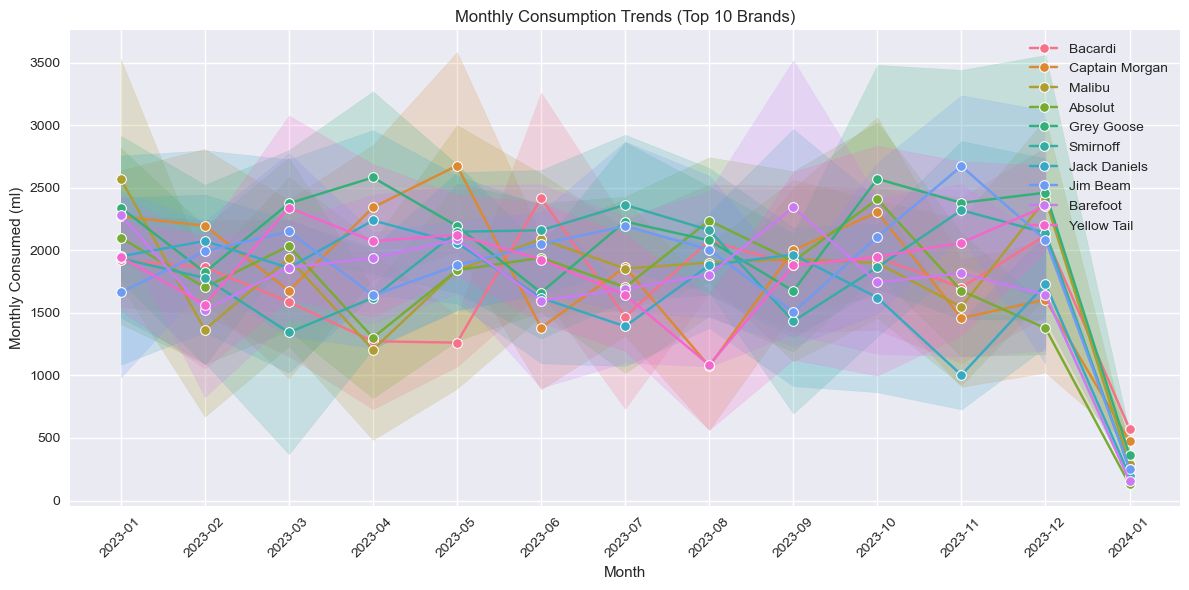

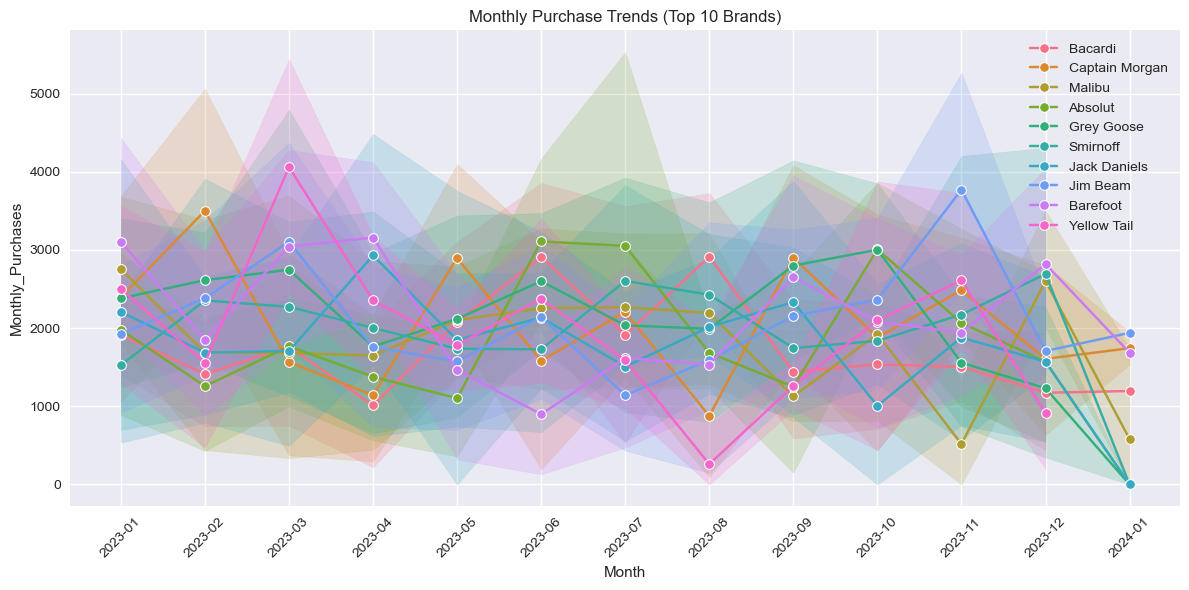

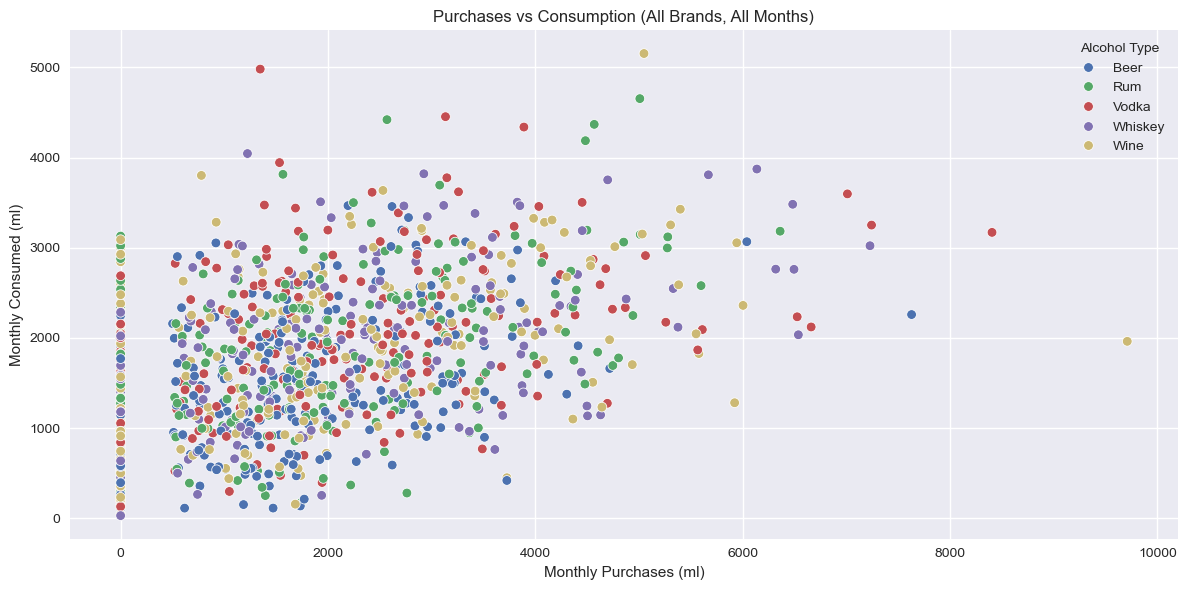

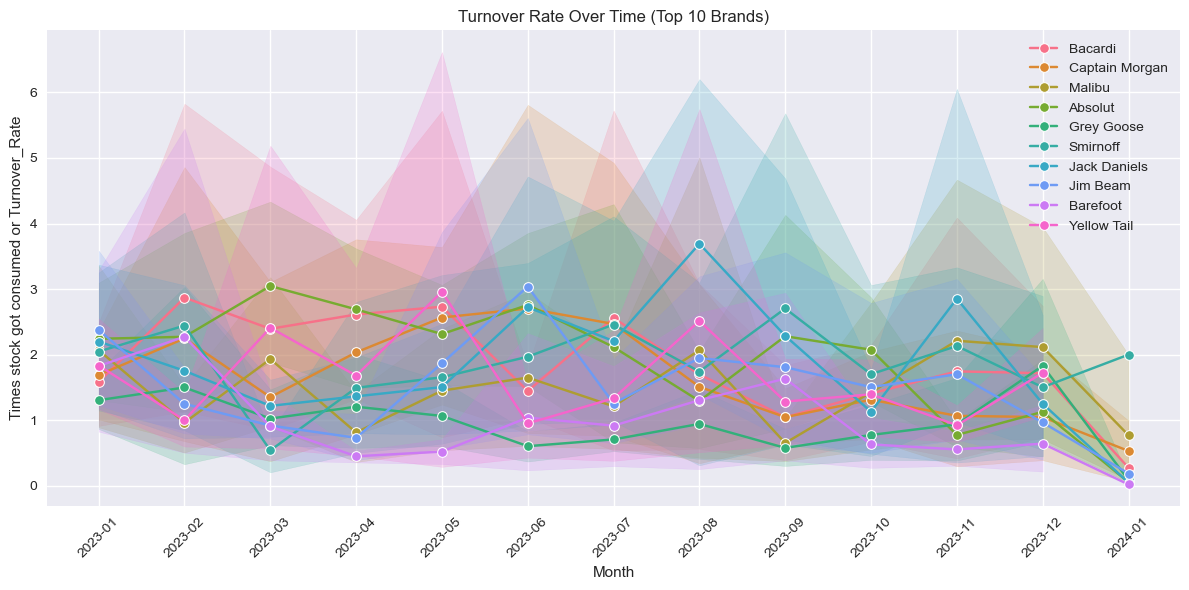

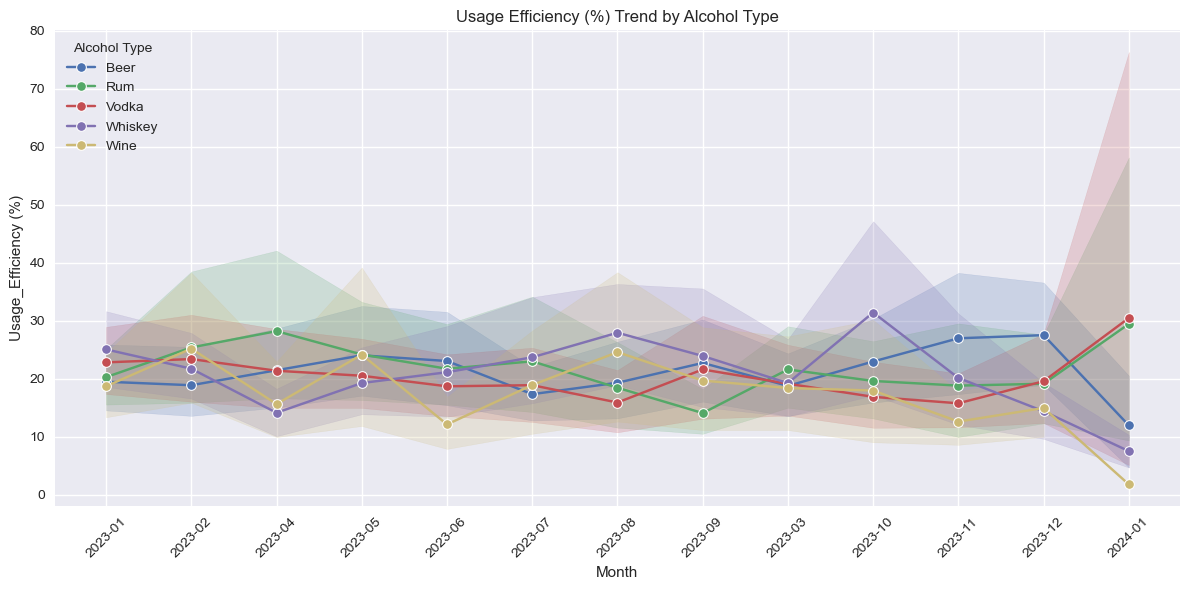

<Figure size 1200x600 with 0 Axes>

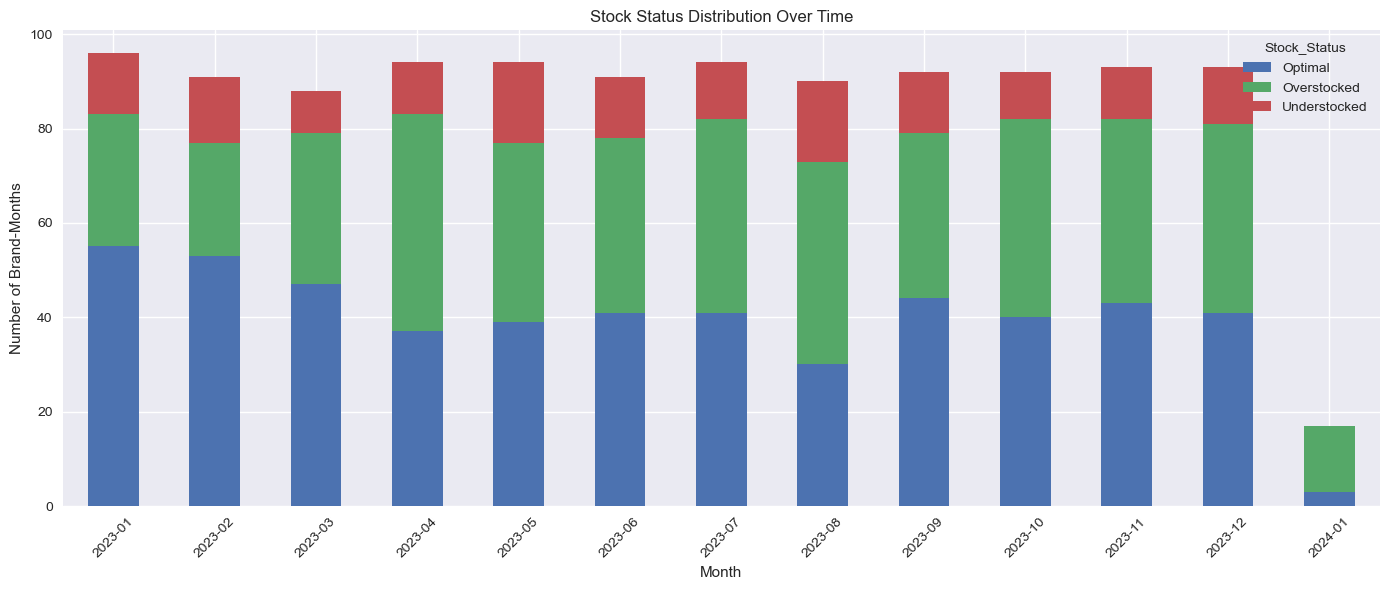

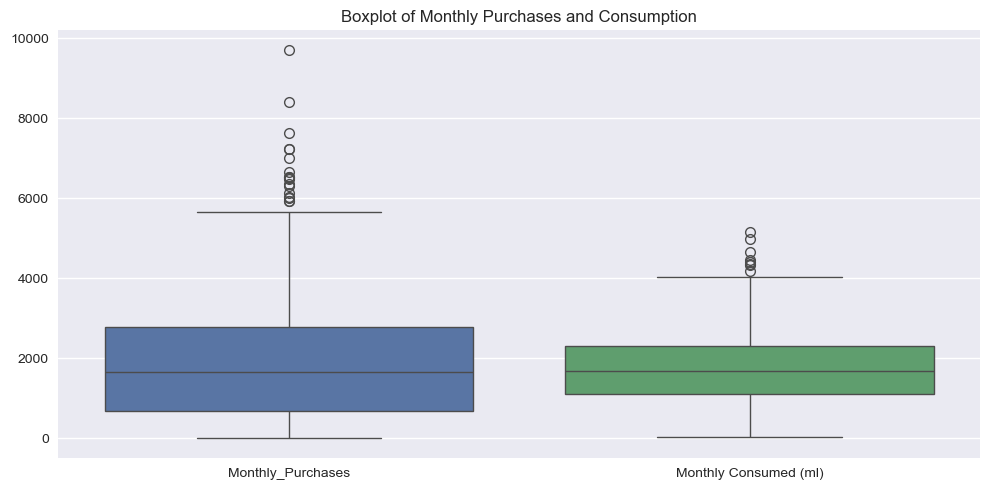

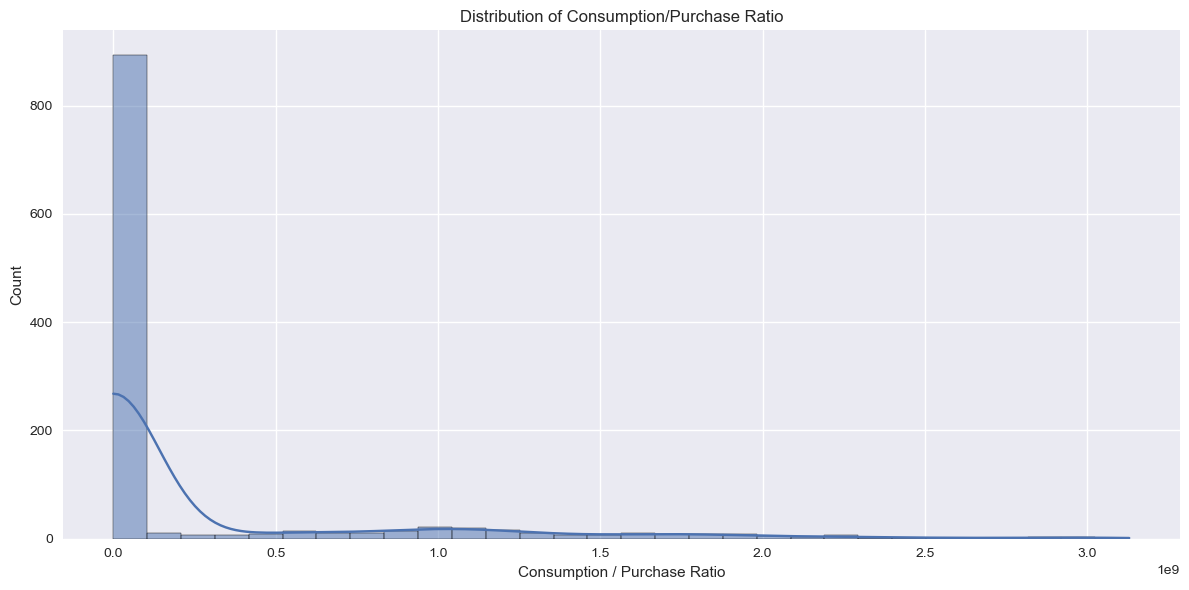

In [481]:
plot_trends(monthly_agg)

LOOKING aat the data it is clear data is having some sort of seasonal trend and purchase mothly vs monthly consumed shows us the disparity of overstocking that is happening and purchase is also having outliers more 


futher 

one more thing to consider is that what kind of liquer is selling at what time weather hard or soft 

# FORCASTING 

I am thinking of taking JIT approach as that is what best fits this scnario but i am not sure if i can implemet it as lead time , what to consider overstock and what to consider understock is still unclear as per data  further what is reorder fequency is also not sure or we will have to make a method to find that in this data 

SIMULATION IS WAY TO GO 


BUSINESS RULES

In [482]:
service_level=0.95
lead_time_days=7 
safety_buffer=1.65 
reorder_frequency=7
min_par_level_days=7
max_par_level_days=20   #these are thngs related to supply chaingin and we have to assume it here 

In [483]:
def forecast_demand( monthly_data, forecast_months=3):
    forecasts = []

    grouped = monthly_data.groupby(['Bar Name', 'Alcohol Type', 'Brand Name'])

    for key, group in grouped:
        group = group.sort_values('Month')
        
        if len(group) < 3:  # Need minimum 3 months of data
            continue
            
        consumption_series = group['Monthly Consumed (ml)'].values
        daily_consumption_series = group['Daily_Consumption(ml)'].values
        
        # Method 1: Simple Moving Average (last 3 months)
        sma_forecast = np.mean(consumption_series[-3:])
        
        # Method 2: Weighted Moving Average (more weight to recent months)
        weights = np.array([0.2, 0.3, 0.5])  # Recent months get higher weight
        if len(consumption_series) >= 3:
            wma_forecast = np.average(consumption_series[-3:], weights=weights)
        else:
            wma_forecast = sma_forecast
    
        # Method 3: Trend-adjusted forecast
        if len(consumption_series) >= 6:
            # Calculate trend from last 6 months
            x = np.arange(len(consumption_series[-6:]))
            y = consumption_series[-6:]
            trend = np.polyfit(x, y, 1)[0]  # Linear trend
            trend_forecast = consumption_series[-1] + trend
        else:
            trend_forecast = sma_forecast
        
        # Ensemble forecast (average of methods)
        final_forecast = (sma_forecast + wma_forecast + trend_forecast) / 3
        
        # Calculate demand variability for safety stock
        demand_std = np.std(daily_consumption_series) if len(daily_consumption_series) > 1 else 0
        
        # Use the actual calendar days for the latest month (fallback=30)
        days_in_month = int(group['Days_In_Month'].iloc[-1]) if 'Days_In_Month' in group.columns else 30
        
        # Get latest metrics
        latest_data = group.iloc[-1]
        
        forecasts.append({
            'Bar Name': key[0],
            'Alcohol Type': key[1],
            'Brand Name': key[2],
            'Historical_Avg_Monthly': np.mean(consumption_series),
            'Forecast_Monthly_Consumption': round(final_forecast, 2),
            'Forecast_Daily_Consumption': round(final_forecast / days_in_month, 2),
            'Demand_Variability_Std': round(demand_std, 2),
            'Current_Movement_Category': latest_data['Movement_Category'],
            'Current_Stock_Status': latest_data['Stock_Status'],
            'Historical_Months': len(group)
        })

    forecast_df = pd.DataFrame(forecasts)
    print(f"Demand forecasts generated for {len(forecast_df)} items")

    return forecast_df

In [484]:
forecasts_df = forecast_demand(monthly_agg) 

Demand forecasts generated for 96 items


In [485]:
# forecasts_df = forecast_demand('data/monthly_agg.csv') 

In [486]:
forecasts_df.head()

,Bar Name,Alcohol Type,Brand Name,Historical_Avg_Monthly,Forecast_Monthly_Consumption,Forecast_Daily_Consumption,Demand_Variability_Std,Current_Movement_Category,Current_Stock_Status,Historical_Months
0,Anderson's Bar,Beer,Budweiser,1257.786250,1565.99,52.20,19.41,Very Fast Mover,Optimal,8
1,Anderson's Bar,Beer,Coors,1652.253077,879.35,28.37,26.92,Very Slow Mover,Overstocked,13
2,Anderson's Bar,Beer,Heineken,1583.064545,1326.16,42.78,22.34,Very Fast Mover,Understocked,11
3,Anderson's Bar,Beer,Miller,1515.025000,914.56,29.50,17.58,Very Fast Mover,Understocked,12
4,Anderson's Bar,Rum,Bacardi,2163.872500,2376.29,76.65,33.97,Very Fast Mover,Optimal,12


In [487]:
def calculate_inventory_recommendations(forecast_df,lead_time_days=3):
    recommendations = forecast_df.copy()
    
    # Safety Stock = Z-score × Standard Deviation × √Lead Time
    recommendations['Safety_Stock'] = ( safety_buffer * recommendations['Demand_Variability_Std'] * np.sqrt(lead_time_days)
    ).round(2)
    
    # Reorder Point = (Daily Demand × Lead Time) + Safety Stock
    recommendations['Reorder_Point'] = (
        recommendations['Forecast_Daily_Consumption'] * lead_time_days +
        recommendations['Safety_Stock']
    ).round(2)
    
    # Par Level based on movement category
    def calculate_par_level(row):
        daily_demand = row['Forecast_Daily_Consumption']
        category = row['Current_Movement_Category']
        
        if category == "Very Fast Mover":
            return daily_demand * 10  # 10 days stock
        elif category == "Fast Mover":
            return daily_demand * 14  # 2 weeks stock
        elif category == "Medium Mover":
            return daily_demand * 21  # 3 weeks stock
        elif category == "Slow Mover":
            return daily_demand * 30  # 1 month stock
        else:  # Very Slow Mover
            return daily_demand * 45  # 1.5 months stock
    
    recommendations['Par_Level'] = recommendations.apply(calculate_par_level, axis=1).round(2)
    
    # Maximum Stock Level (Par Level + Safety Stock)
    recommendations['Max_Stock_Level'] = (
        recommendations['Par_Level'] + recommendations['Safety_Stock']
    ).round(2)
    
    # Order Quantity (Economic Order Quantity simplified)
    recommendations['Suggested_Order_Qty'] = (
        recommendations['Forecast_Monthly_Consumption'] * 0.5  # Half month supply
    ).round(2)
    
    # Business Priority Classification
    def classify_priority(row):
        if row['Current_Movement_Category'] in ["Very Fast Mover", "Fast Mover"]:
            if row['Current_Stock_Status'] == "Understocked":
                return "HIGH PRIORITY"
            else:
                return "Medium Priority"
        elif row['Current_Stock_Status'] == "Overstocked":
            return "Reduce Stock"
        else:
            return "Low Priority"
    
    recommendations['Business_Priority'] = recommendations.apply(classify_priority, axis=1)
    
    print(f"Inventory recommendations calculated")
    print(f"Service Level: {service_level*100}%")
    print(f"Lead Time: {lead_time_days} days")
    
    return recommendations

In [488]:
recommendations_df= calculate_inventory_recommendations(forecasts_df)

Inventory recommendations calculated
Service Level: 95.0%
Lead Time: 3 days


In [489]:
recommendations_df.head(55)

,Bar Name,Alcohol Type,Brand Name,Historical_Avg_Monthly,Forecast_Monthly_Consumption,Forecast_Daily_Consumption,Demand_Variability_Std,Current_Movement_Category,Current_Stock_Status,Historical_Months,Safety_Stock,Reorder_Point,Par_Level,Max_Stock_Level,Suggested_Order_Qty,Business_Priority
0,Anderson's Bar,Beer,Budweiser,1257.786250,1565.99,52.20,19.41,Very Fast Mover,Optimal,8,55.47,212.07,522.00,577.47,783.00,Medium Priority
1,Anderson's Bar,Beer,Coors,1652.253077,879.35,28.37,26.92,Very Slow Mover,Overstocked,13,76.93,162.04,1276.65,1353.58,439.68,Reduce Stock
2,Anderson's Bar,Beer,Heineken,1583.064545,1326.16,42.78,22.34,Very Fast Mover,Understocked,11,63.85,192.19,427.80,491.65,663.08,HIGH PRIORITY
3,Anderson's Bar,Beer,Miller,1515.025000,914.56,29.50,17.58,Very Fast Mover,Understocked,12,50.24,138.74,295.00,345.24,457.28,HIGH PRIORITY
4,Anderson's Bar,Rum,Bacardi,2163.872500,2376.29,76.65,33.97,Very Fast Mover,Optimal,12,97.08,327.03,766.50,863.58,1188.14,Medium Priority
5,Anderson's Bar,Rum,Captain Morgan,2255.569167,2413.38,77.85,34.55,Slow Mover,Overstocked,12,98.74,332.29,2335.50,2434.24,1206.69,Reduce Stock
6,Anderson's Bar,Rum,Malibu,1359.476000,602.30,19.43,26.06,Slow Mover,Overstocked,10,74.48,132.77,582.90,657.38,301.15,Reduce Stock
7,Anderson's Bar,Vodka,Absolut,1311.391000,1544.49,49.82,15.36,Very Fast Mover,Understocked,10,43.90,193.36,498.20,542.10,772.24,HIGH PRIORITY
8,Anderson's Bar,Vodka,Grey Goose,2002.196667,1291.77,41.67,27.53,Very Fast Mover,Understocked,12,78.68,203.69,416.70,495.38,645.88,HIGH PRIORITY
9,Anderson's Bar,Vodka,Smirnoff,2074.139167,2345.42,75.66,24.98,Slow Mover,Overstocked,12,71.39,298.37,2269.80,2341.19,1172.71,Reduce Stock


In [490]:
def generate_business_insights(monthly_data, recommendations):
    """
    Generate actionable business insights
    
    Args:
        monthly_data (DataFrame): Monthly metrics
        recommendations (DataFrame): Inventory recommendations
        
    Returns:
        dict: Business insights and recommendations
    """
    insights = {}
    
    # Bar Performance Analysis
    bar_performance = monthly_data.groupby('Bar Name').agg({
        'Monthly Consumed (ml)': 'sum',
        'Times stock got consumed or Turnover_Rate': 'mean',
        'Stock_Status': lambda x: (x == 'Overstocked').sum() / len(x)
    }).round(3)
    bar_performance.columns = ['Total_Consumption', 'Avg_Turnover', 'Overstock_Rate']
    insights['bar_performance'] = bar_performance.sort_values('Total_Consumption', ascending=False)
    
    # Problem Items Analysis
    problem_items = recommendations[
        (recommendations['Current_Stock_Status'] == 'Overstocked') |
        (recommendations['Business_Priority'] == 'HIGH PRIORITY')
    ].copy()
    insights['problem_items'] = problem_items
    
    # Fast Movers needing attention
    fast_movers_understock = recommendations[
        (recommendations['Current_Movement_Category'].isin(['Very Fast Mover', 'Fast Mover'])) &
        (recommendations['Current_Stock_Status'] == 'Understocked')
    ]
    insights['critical_stockouts'] = fast_movers_understock
    
    # Slow movers with excess stock
    slow_movers_overstock = recommendations[
        (recommendations['Current_Movement_Category'].isin(['Slow Mover', 'Very Slow Mover'])) &
        (recommendations['Current_Stock_Status'] == 'Overstocked')
    ]
    insights['excess_inventory'] = slow_movers_overstock
    
    # Brand Performance
    brand_performance = monthly_data.groupby('Brand Name').agg({
        'Monthly Consumed (ml)': 'sum',
        'Times stock got consumed or Turnover_Rate': 'mean'
    }).round(3)
    
    insights['brand_performance'] = brand_performance.sort_values('Monthly Consumed (ml)', ascending=False)
    
    return insights

In [491]:
insights_df= generate_business_insights(monthly_agg, recommendations_df)

In [492]:
insights_df

{'bar_performance':                 Total_Consumption  Avg_Turnover  Overstock_Rate
 Bar Name                                                       
 Johnson's Bar           344184.38         1.291           0.492
 Anderson's Bar          335818.95         1.692           0.413
 Smith's Bar             328713.91         1.449           0.463
 Brown's Bar             326371.92         1.576           0.408
 Thomas's Bar            318415.94         1.670           0.380
 Taylor's Bar            314674.40         1.772           0.284,
 'problem_items':           Bar Name Alcohol Type      Brand Name  Historical_Avg_Monthly  \
 1   Anderson's Bar         Beer           Coors             1652.253077   
 2   Anderson's Bar         Beer        Heineken             1583.064545   
 3   Anderson's Bar         Beer          Miller             1515.025000   
 5   Anderson's Bar          Rum  Captain Morgan             2255.569167   
 6   Anderson's Bar          Rum          Malibu             13

In [493]:
insights_df['bar_performance'].head(10)
    

,Total_Consumption,Avg_Turnover,Overstock_Rate
Bar Name,,,
Johnson's Bar,344184.38,1.291,0.492
Anderson's Bar,335818.95,1.692,0.413
Smith's Bar,328713.91,1.449,0.463
Brown's Bar,326371.92,1.576,0.408
Thomas's Bar,318415.94,1.670,0.380
Taylor's Bar,314674.40,1.772,0.284


In [494]:
insights_df['brand_performance'].head(10)

,Monthly Consumed (ml),Times stock got consumed or Turnover_Rate
Brand Name,,
Grey Goose,158924.02,1.014
Jim Beam,139702.43,1.594
Captain Morgan,138035.53,1.721
Barefoot,132312.95,1.041
Yellow Tail,129341.49,1.647
Smirnoff,129176.67,1.905
Bacardi,127951.80,1.964
Malibu,127279.51,1.532
Jack Daniels,125050.89,2.011


In [495]:
insights_df['problem_items'].describe()

,Historical_Avg_Monthly,Forecast_Monthly_Consumption,Forecast_Daily_Consumption,Demand_Variability_Std,Historical_Months,Safety_Stock,Reorder_Point,Par_Level,Max_Stock_Level,Suggested_Order_Qty
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,1760.629340,1402.530169,45.260678,25.222203,11.847458,72.082542,207.864576,1270.576780,1342.659322,701.264915
std,309.800444,580.690701,18.719160,5.594543,0.867290,15.988564,56.266384,628.235637,629.679053,290.345267
min,1010.867000,423.870000,13.670000,15.360000,10.000000,43.900000,102.250000,173.600000,275.830000,211.940000
25%,1510.990000,896.955000,28.935000,20.885000,11.500000,59.685000,168.845000,692.300000,771.805000,448.480000
50%,1810.565833,1360.080000,43.870000,25.430000,12.000000,72.680000,196.550000,1229.400000,1310.430000,680.040000
75%,1984.621477,1958.205000,63.165000,29.995000,12.000000,85.720000,248.435000,1841.175000,1909.465000,979.105000
max,2334.824167,2543.700000,82.050000,35.770000,13.000000,102.230000,332.290000,2335.500000,2434.240000,1271.850000


In [496]:
len(insights_df['problem_items'])

59

In [497]:
insights_df['problem_items'].head(10)

,Bar Name,Alcohol Type,Brand Name,Historical_Avg_Monthly,Forecast_Monthly_Consumption,Forecast_Daily_Consumption,Demand_Variability_Std,Current_Movement_Category,Current_Stock_Status,Historical_Months,Safety_Stock,Reorder_Point,Par_Level,Max_Stock_Level,Suggested_Order_Qty,Business_Priority
1,Anderson's Bar,Beer,Coors,1652.253077,879.35,28.37,26.92,Very Slow Mover,Overstocked,13,76.93,162.04,1276.65,1353.58,439.68,Reduce Stock
2,Anderson's Bar,Beer,Heineken,1583.064545,1326.16,42.78,22.34,Very Fast Mover,Understocked,11,63.85,192.19,427.80,491.65,663.08,HIGH PRIORITY
3,Anderson's Bar,Beer,Miller,1515.025000,914.56,29.50,17.58,Very Fast Mover,Understocked,12,50.24,138.74,295.00,345.24,457.28,HIGH PRIORITY
5,Anderson's Bar,Rum,Captain Morgan,2255.569167,2413.38,77.85,34.55,Slow Mover,Overstocked,12,98.74,332.29,2335.50,2434.24,1206.69,Reduce Stock
6,Anderson's Bar,Rum,Malibu,1359.476000,602.30,19.43,26.06,Slow Mover,Overstocked,10,74.48,132.77,582.90,657.38,301.15,Reduce Stock
7,Anderson's Bar,Vodka,Absolut,1311.391000,1544.49,49.82,15.36,Very Fast Mover,Understocked,10,43.90,193.36,498.20,542.10,772.24,HIGH PRIORITY
8,Anderson's Bar,Vodka,Grey Goose,2002.196667,1291.77,41.67,27.53,Very Fast Mover,Understocked,12,78.68,203.69,416.70,495.38,645.88,HIGH PRIORITY
9,Anderson's Bar,Vodka,Smirnoff,2074.139167,2345.42,75.66,24.98,Slow Mover,Overstocked,12,71.39,298.37,2269.80,2341.19,1172.71,Reduce Stock
10,Anderson's Bar,Whiskey,Jack Daniels,1787.860000,833.38,26.88,35.28,Very Slow Mover,Overstocked,12,100.83,181.47,1209.60,1310.43,416.69,Reduce Stock
11,Anderson's Bar,Whiskey,Jameson,1926.425000,1502.05,48.45,22.04,Medium Mover,Overstocked,12,62.99,208.34,1017.45,1080.44,751.02,Reduce Stock


In [498]:
len(insights_df["excess_inventory"])

40

In [499]:
insights_df["excess_inventory"].head(10)

,Bar Name,Alcohol Type,Brand Name,Historical_Avg_Monthly,Forecast_Monthly_Consumption,Forecast_Daily_Consumption,Demand_Variability_Std,Current_Movement_Category,Current_Stock_Status,Historical_Months,Safety_Stock,Reorder_Point,Par_Level,Max_Stock_Level,Suggested_Order_Qty,Business_Priority
1,Anderson's Bar,Beer,Coors,1652.253077,879.35,28.37,26.92,Very Slow Mover,Overstocked,13,76.93,162.04,1276.65,1353.58,439.68,Reduce Stock
5,Anderson's Bar,Rum,Captain Morgan,2255.569167,2413.38,77.85,34.55,Slow Mover,Overstocked,12,98.74,332.29,2335.50,2434.24,1206.69,Reduce Stock
6,Anderson's Bar,Rum,Malibu,1359.476000,602.30,19.43,26.06,Slow Mover,Overstocked,10,74.48,132.77,582.90,657.38,301.15,Reduce Stock
9,Anderson's Bar,Vodka,Smirnoff,2074.139167,2345.42,75.66,24.98,Slow Mover,Overstocked,12,71.39,298.37,2269.80,2341.19,1172.71,Reduce Stock
10,Anderson's Bar,Whiskey,Jack Daniels,1787.860000,833.38,26.88,35.28,Very Slow Mover,Overstocked,12,100.83,181.47,1209.60,1310.43,416.69,Reduce Stock
13,Anderson's Bar,Wine,Barefoot,2249.135833,2005.19,64.68,33.74,Slow Mover,Overstocked,12,96.43,290.47,1940.40,2036.83,1002.60,Reduce Stock
14,Anderson's Bar,Wine,Sutter Home,1901.311667,1373.70,44.31,31.14,Very Slow Mover,Overstocked,12,88.99,221.92,1993.95,2082.94,686.85,Reduce Stock
18,Brown's Bar,Beer,Heineken,1502.879231,423.87,13.67,21.43,Very Slow Mover,Overstocked,13,61.24,102.25,615.15,676.39,211.94,Reduce Stock
27,Brown's Bar,Whiskey,Jameson,1984.427500,2325.06,75.00,22.43,Slow Mover,Overstocked,12,64.10,289.10,2250.00,2314.10,1162.53,Reduce Stock
29,Brown's Bar,Wine,Barefoot,1480.478462,778.50,25.11,24.24,Very Slow Mover,Overstocked,13,69.28,144.61,1129.95,1199.23,389.25,Reduce Stock


In [500]:
len(insights_df['critical_stockouts'])

11

In [501]:
insights_df['critical_stockouts'].head(10)

,Bar Name,Alcohol Type,Brand Name,Historical_Avg_Monthly,Forecast_Monthly_Consumption,Forecast_Daily_Consumption,Demand_Variability_Std,Current_Movement_Category,Current_Stock_Status,Historical_Months,Safety_Stock,Reorder_Point,Par_Level,Max_Stock_Level,Suggested_Order_Qty,Business_Priority
2,Anderson's Bar,Beer,Heineken,1583.064545,1326.16,42.78,22.34,Very Fast Mover,Understocked,11,63.85,192.19,427.8,491.65,663.08,HIGH PRIORITY
3,Anderson's Bar,Beer,Miller,1515.025000,914.56,29.50,17.58,Very Fast Mover,Understocked,12,50.24,138.74,295.0,345.24,457.28,HIGH PRIORITY
7,Anderson's Bar,Vodka,Absolut,1311.391000,1544.49,49.82,15.36,Very Fast Mover,Understocked,10,43.90,193.36,498.2,542.10,772.24,HIGH PRIORITY
8,Anderson's Bar,Vodka,Grey Goose,2002.196667,1291.77,41.67,27.53,Very Fast Mover,Understocked,12,78.68,203.69,416.7,495.38,645.88,HIGH PRIORITY
24,Brown's Bar,Vodka,Grey Goose,2322.775000,2110.55,68.08,33.32,Very Fast Mover,Understocked,12,95.22,299.46,680.8,776.02,1055.28,HIGH PRIORITY
26,Brown's Bar,Whiskey,Jack Daniels,1715.305455,538.16,17.36,35.77,Very Fast Mover,Understocked,11,102.23,154.31,173.6,275.83,269.08,HIGH PRIORITY
35,Johnson's Bar,Beer,Miller,1360.438333,1464.63,47.25,18.30,Very Fast Mover,Understocked,12,52.30,194.05,472.5,524.80,732.32,HIGH PRIORITY
54,Smith's Bar,Rum,Malibu,2046.015000,2048.38,66.08,17.39,Very Fast Mover,Understocked,12,49.70,247.94,660.8,710.50,1024.19,HIGH PRIORITY
67,Taylor's Bar,Beer,Miller,1431.758000,993.38,33.11,25.68,Very Fast Mover,Understocked,10,73.39,172.72,331.1,404.49,496.69,HIGH PRIORITY
68,Taylor's Bar,Rum,Bacardi,1506.710909,1539.53,49.66,18.19,Very Fast Mover,Understocked,11,51.98,200.96,496.6,548.58,769.76,HIGH PRIORITY


In [502]:
def create_dashboard_visualizations( monthly_data, recommendations, insights):
    """
    Create comprehensive dashboard visualizations
    
    Args:
        monthly_data (DataFrame): Monthly data
        recommendations (DataFrame): Recommendations
        insights (dict): Business insights
    """
    plt.style.use('seaborn-v0_8')
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle('Hotel Bar Inventory Management Dashboard', fontsize=16, fontweight='bold')
    
    # 1. Movement Category Distribution
    movement_counts = recommendations['Current_Movement_Category'].value_counts()
    axes[0,0].pie(movement_counts.values, labels=movement_counts.index, autopct='%1.1f%%')
    axes[0,0].set_title('Item Movement Distribution')
    
    # 2. Stock Status by Bar
    stock_status_bar = pd.crosstab(monthly_data['Bar Name'], monthly_data['Stock_Status'])
    stock_status_bar.plot(kind='bar', stacked=True, ax=axes[0,1])
    axes[0,1].set_title('Stock Status by Bar')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # 3. Turnover Rate Distribution
    axes[0,2].hist(monthly_data['Times stock got consumed or Turnover_Rate'], bins=20, alpha=0.7, color='skyblue')
    axes[0,2].set_title('Turnover Rate Distribution')
    axes[0,2].set_xlabel('Turnover Rate')
    axes[0,2].set_ylabel('Frequency')
    
    # 4. Priority Items Count
    priority_counts = recommendations['Business_Priority'].value_counts()
    axes[1,0].bar(priority_counts.index, priority_counts.values, color=['red', 'orange', 'green', 'blue'])
    axes[1,0].set_title('Business Priority Distribution')
    axes[1,0].tick_params(axis='x', rotation=45)
    
    # 5. Top Consuming Brands
    top_brands = insights['brand_performance'].head(10)
    axes[1,1].barh(top_brands.index, top_brands['Monthly Consumed (ml)'])
    axes[1,1].set_title('Top 10 Brands by Consumption')
    axes[1,1].set_xlabel('Total Monthly Consumption (ml)')
    
    # 6. Safety Stock vs Forecast
    scatter_data = recommendations.sample(min(50, len(recommendations)))  # Sample for readability
    axes[1,2].scatter(scatter_data['Forecast_Daily_Consumption'], 
                        scatter_data['Safety_Stock'], 
                        alpha=0.6, color='coral')
    axes[1,2].set_title('Safety Stock vs Daily Forecast')
    axes[1,2].set_xlabel('Forecast Daily Consumption (ml)')
    axes[1,2].set_ylabel('Safety Stock (ml)')
    
    plt.tight_layout()
    plt.show()
    

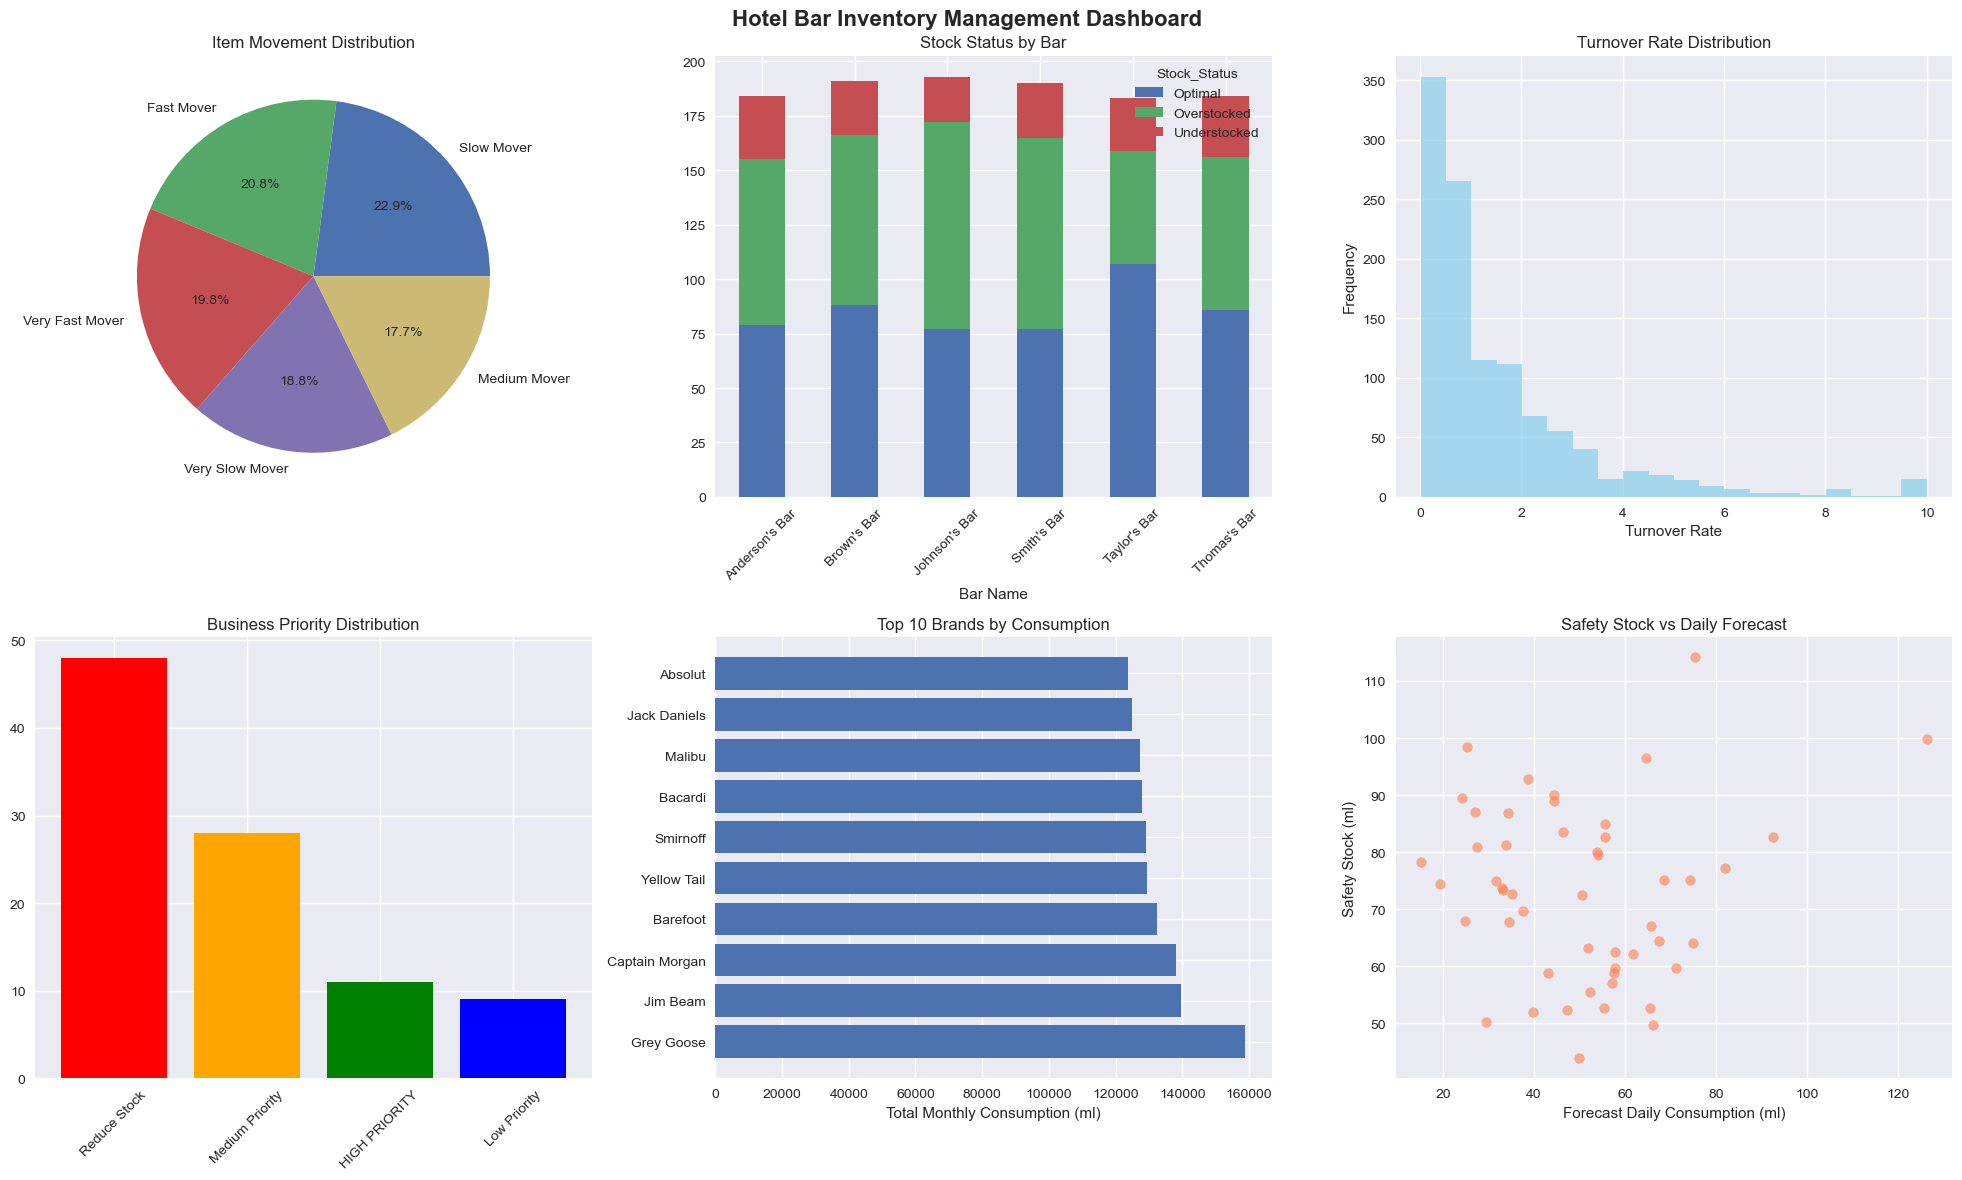

In [503]:
create_dashboard_visualizations(monthly_agg, recommendations_df, insights_df)